Neural Model Identification: \
Trains a neural network based on data from the physics model to use as the predictive model
Note: You need to install the matlab engine to be able to run matlab code from python

In [41]:
import warnings
warnings.filterwarnings("ignore")

import import_ipynb
from neural_network import neural_model
from sklearn.model_selection import train_test_split
import numpy as np
from case_study import CaseStudy
import matplotlib.pyplot as plt

### Generate Data for Training the Physics-based Neural Net

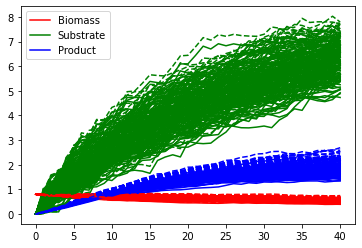

Generated resutls with Ts= 0.1
using 100 iterations


In [42]:
xk = [0.8, 0, 0]  
xkm = [0.8, 0, 0]
Ts = 0.1 #Sampling time, make sure that it's the same as in main
Nk = 40
xlist_plant = [xk]
xlist_model = [xkm]
Xdata = []
Ydata= []
nsim =100

for k in range(nsim):
    xk = [0.8, 0, 0]  
    xkm = [0.8, 0, 0]
    xlist_plant = [xk]
    xlist_model = [xkm]
#    print(k)
    D=np.random.uniform(0.0,0.8,Nk)
    Sf=np.random.uniform(5.0,15.0,Nk)

#     if k==0:
#        D[:]=0.3
#     elif k==1:
#        D[:]=0.0
        
    for i in range(Nk):
        xkplus_plant = CaseStudy.plant_dynamics(xk, D[i],Sf[i],Ts)
        xlist_plant.append(xkplus_plant)
        xk = xkplus_plant
         
        xkplus_model = CaseStudy.model_dynamics(xkm, D[i],Sf[i],Ts)
        #Save input states and model prediction
        Xdata.append([xkm[0],xkm[1],xkm[2],D[i],Sf[i]])
        Ydata.append([xkplus_model[0],xkplus_model[1],xkplus_model[2]])

        xlist_model.append(xkplus_model)
        xkm = xkplus_model
        
    states=np.array(xlist_plant)
    states_model=np.array(xlist_model)
    
    plt.plot(states[:,0],  color="red" )
    plt.plot(states[:,1],  color="green")
    plt.plot(states[:,2],  color="blue")
    plt.plot(states_model[:,0], '--',color="red")
    plt.plot(states_model[:,1], '--',color="green")
    plt.plot(states_model[:,2], '--',color="blue")
    
plt.legend(['Biomass','Substrate','Product'])
plt.show()
print('Generated resutls with Ts=',Ts)
print('using', nsim, 'iterations')
X=np.array(Xdata)
Y=np.array(Ydata)
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
savetxt('Xdata.csv',X, delimiter=',')
savetxt('Ydata.csv',Y, delimiter=',')


In [43]:
# import scipy.io
# model_data = scipy.io.loadmat('Data.mat')

In [44]:
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
Zin=loadtxt('Xdata.csv', delimiter=',')
Zout= loadtxt('Ydata.csv', delimiter=',')

In [45]:
Zin.shape

(4000, 5)

#### Prepare Dataset

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(Zin, Zout, shuffle=True, train_size=0.9, random_state=42)
in_dim = X_train.shape[1]
out_dim = Y_train.shape[1]

In [47]:
Y_test.shape

(400, 3)

In [48]:
X_train.shape

(3600, 5)

In [49]:
pred_model = neural_model(epochs=300,bs=15).get_model(X_train, Y_train, False, [], X_test,Y_test, validation=True)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 12)           72          input_3[0][0]                    
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 12)           156         dense_14[0][0]                   
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 12)           156         dense_15[0][0]                   
____________________________________________________________________________________________

3600/3600 [==============================] - 0s 50us/sample - loss: 0.0047 - val_loss: 0.0037
Epoch 54/300
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0045 - val_loss: 0.0044
Epoch 55/300
3600/3600 [==============================] - 0s 50us/sample - loss: 0.0045 - val_loss: 0.0039
Epoch 56/300
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0045 - val_loss: 0.0035
Epoch 57/300
3600/3600 [==============================] - 0s 53us/sample - loss: 0.0045 - val_loss: 0.0032
Epoch 58/300
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0043 - val_loss: 0.0037
Epoch 59/300
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0044 - val_loss: 0.0045
Epoch 60/300
3600/3600 [==============================] - 0s 50us/sample - loss: 0.0043 - val_loss: 0.0051
Epoch 61/300
3600/3600 [==============================] - 0s 51us/sample - loss: 0.0044 - val_loss: 0.0041
Epoch 62/300
3600/3600 [==========================

3600/3600 [==============================] - 0s 70us/sample - loss: 0.0030 - val_loss: 0.0037
Epoch 130/300
3600/3600 [==============================] - 0s 56us/sample - loss: 0.0030 - val_loss: 0.0026
Epoch 131/300
3600/3600 [==============================] - 0s 68us/sample - loss: 0.0030 - val_loss: 0.0027
Epoch 132/300
3600/3600 [==============================] - 0s 65us/sample - loss: 0.0030 - val_loss: 0.0031
Epoch 133/300
3600/3600 [==============================] - 0s 64us/sample - loss: 0.0030 - val_loss: 0.0045
Epoch 134/300
3600/3600 [==============================] - 0s 62us/sample - loss: 0.0029 - val_loss: 0.0037
Epoch 135/300
3600/3600 [==============================] - 0s 63us/sample - loss: 0.0030 - val_loss: 0.0021
Epoch 136/300
3600/3600 [==============================] - 0s 89us/sample - loss: 0.0029 - val_loss: 0.0035
Epoch 137/300
3600/3600 [==============================] - 0s 99us/sample - loss: 0.0029 - val_loss: 0.0032
Epoch 138/300
3600/3600 [=================

Epoch 205/300
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0024 - val_loss: 0.0020
Epoch 206/300
3600/3600 [==============================] - 0s 68us/sample - loss: 0.0024 - val_loss: 0.0019
Epoch 207/300
3600/3600 [==============================] - 0s 73us/sample - loss: 0.0024 - val_loss: 0.0019
Epoch 208/300
3600/3600 [==============================] - 0s 69us/sample - loss: 0.0024 - val_loss: 0.0024
Epoch 209/300
3600/3600 [==============================] - 0s 76us/sample - loss: 0.0023 - val_loss: 0.0021
Epoch 210/300
3600/3600 [==============================] - 0s 80us/sample - loss: 0.0023 - val_loss: 0.0031
Epoch 211/300
3600/3600 [==============================] - 0s 77us/sample - loss: 0.0023 - val_loss: 0.0026
Epoch 212/300
3600/3600 [==============================] - 0s 61us/sample - loss: 0.0024 - val_loss: 0.0017
Epoch 213/300
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0023 - val_loss: 0.0019
Epoch 214/300
3600/3600 [===

Epoch 281/300
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0020 - val_loss: 0.0028
Epoch 282/300
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0020 - val_loss: 0.0021
Epoch 283/300
3600/3600 [==============================] - 0s 58us/sample - loss: 0.0020 - val_loss: 0.0018
Epoch 284/300
3600/3600 [==============================] - 0s 55us/sample - loss: 0.0020 - val_loss: 0.0021
Epoch 285/300
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0020 - val_loss: 0.0025
Epoch 286/300
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0020 - val_loss: 0.0023
Epoch 287/300
3600/3600 [==============================] - 0s 57us/sample - loss: 0.0019 - val_loss: 0.0017
Epoch 288/300
3600/3600 [==============================] - 0s 64us/sample - loss: 0.0019 - val_loss: 0.0015
Epoch 289/300
3600/3600 [==============================] - 0s 59us/sample - loss: 0.0019 - val_loss: 0.0019
Epoch 290/300
3600/3600 [===

(0.0010861777484288374, 0.1)

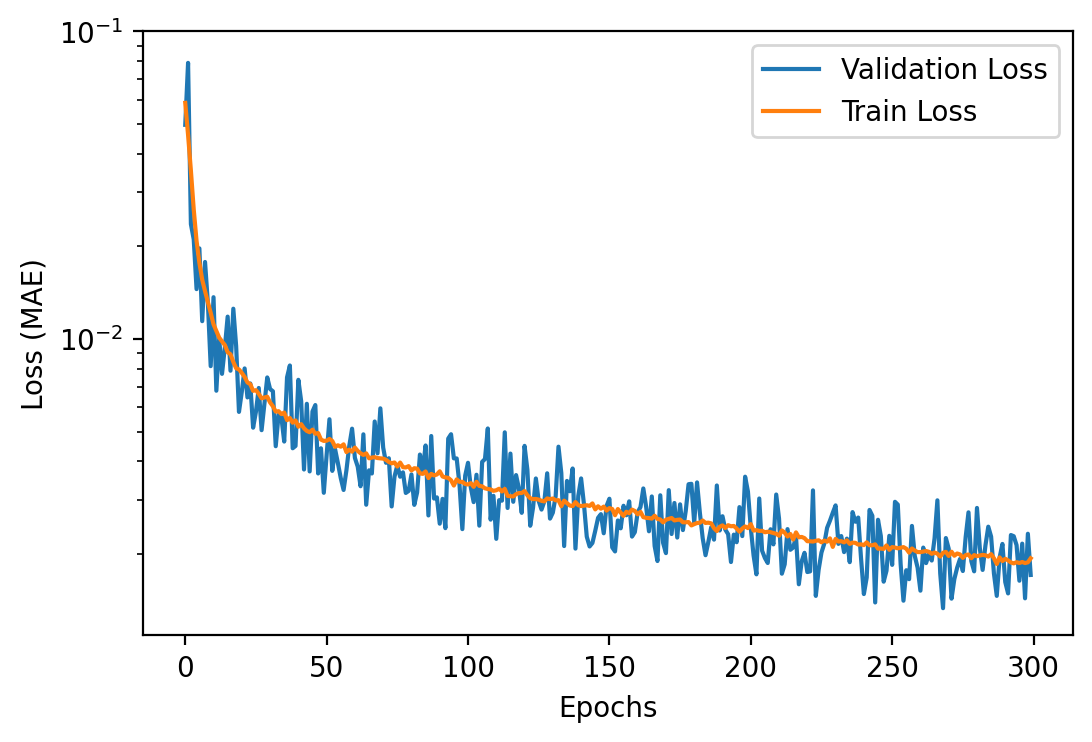

In [50]:
plt.figure(2,dpi=200)
plt.semilogy(pred_model.history.history['val_loss'])
plt.semilogy(pred_model.history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.legend(['Validation Loss','Train Loss'])
plt.ylim([0,0.1])

In [51]:
weights1 = pred_model.get_weights() # returs a numpy list of weights

In [52]:
#nnet.set_weights(weights)

In [53]:
Wmat = np.array(weights1)

In [54]:
import pickle as pkl
fileObject = open("weights_initialization.npy", 'wb')
pkl.dump(Wmat, fileObject)
fileObject.close()

In [55]:
fileObject_load = open("weights_initialization.npy", 'rb')
Wmat = pkl.load(fileObject_load)

In [56]:
Wmat

array([array([[ 1.315646  , -0.26417142, -0.36083293,  0.20640309, -0.34783888,
        -0.40570655,  0.45775017,  0.78489685,  0.0398866 , -0.26785094,
         0.33707666,  0.7122278 ],
       [-0.14745733, -0.6812308 ,  0.2722458 , -0.03118326,  0.18457401,
         0.34871215,  0.16875829,  0.10094835, -0.09906886, -0.43230835,
         0.4726522 ,  0.4896161 ],
       [-0.56279415,  0.2526342 , -0.69819164, -0.4193663 ,  0.47088256,
        -0.45282146, -0.08254012,  0.20404887, -0.16426882, -0.16424948,
        -0.3451023 , -0.5128353 ],
       [ 0.10642324, -0.09730874, -0.08609918,  0.12540165,  1.9542322 ,
         0.5375579 , -0.18213478, -1.6873069 , -1.7630762 ,  2.0241385 ,
        -0.7399228 , -0.03824088],
       [ 0.14797279, -0.33350685, -0.3029565 , -0.11142316,  0.10670112,
        -0.79847467, -0.01410636, -0.02223667,  0.5131019 ,  0.40442526,
        -0.21411848,  0.01098505]], dtype=float32),
       array([ 0.08072648,  0.02241649, -0.06427956, -0.23677166, -0.19